# TP3 - Exercice 1 - Algorithme "pocket" pour le perceptron

(Question 1)

(2, 60)
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]


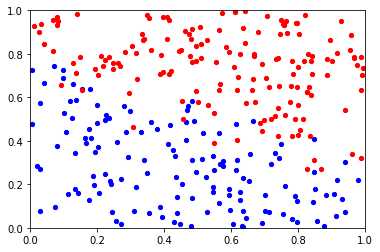

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import queue

# Permet l'affichage des graphiques

%matplotlib inline

# Variable utiles

nb_features = 2

# Génération d'un tableau de 100 points uniformément réparti

def generate_points(nb_points):
    points = [[] for _ in range(nb_features)]
    points_class = []

    for i in range(nb_points):
        ps = []

        for _ in range(nb_features):
            ps.append(np.random.random())

        point_class = 0
        if (-1/2) * ps[0] + 0.75 < ps[1]:
            point_class = 1
            
        # Distance entre le point généré
        # et la droite y = -0.5x + 0.75
        d = np.abs((-0.5*ps[0] - ps[1] + 0.75) / (1 + np.square(0.5)))
        theta = np.exp(-np.square(d) / (2 * np.square(0.05)))
        if np.random.random() < theta/2:
            if point_class == 1:
                point_class = 0
            else:
                point_class = 1
        
        for j in range(nb_features):
            points[j].append(ps[j])

        points_class.append(point_class)

    return points, points_class

# Découpage en 20/80 de l'ensemble
def datagen(n):
    ps, ps_classes = generate_points(n)
    X_train = [[] for _ in range(nb_features)]
    c_train = []
    X_test = [[] for _ in range(nb_features)]
    c_test = []

    limit = int(len(ps_classes) * (20/100))

    for i in range(len(ps_classes)):
        p = []
        for j in range(nb_features):
            p.append(ps[j][i])

        if i > limit-1:
            for j in range(nb_features):
                X_test[j].append(p[j])
            c_test.append(ps_classes[i])
        else:
            for j in range(nb_features):
                X_train[j].append(p[j])
            c_train.append(ps_classes[i])

    return X_train, c_train, X_test, c_test, ps, ps_classes

X_train, c_train, X_test, c_test, points, points_class = datagen(300)

print(c_train)

points_x_0 = []
points_y_0 = []
points_x_1 = []
points_y_1 = []

for i in range(len(points_class)):
    if points_class[i] == 0:
        points_x_0.append(points[0][i])
        points_y_0.append(points[1][i])
    else:
        points_x_1.append(points[0][i])
        points_y_1.append(points[1][i])

plt.scatter(points_x_0, points_y_0, s=18, c='blue')
plt.scatter(points_x_1, points_y_1, s=18, c='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

(Question 2 et 3)

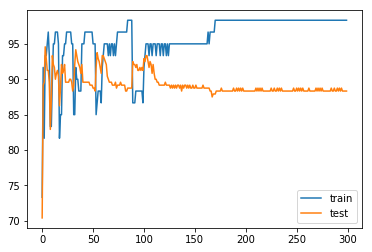

In [2]:
# Fonction ptest qui évalue un x selon un theta
def ptest(x, theta):
    # Ajout du 1 à chaque x
    npx = np.insert(np.array(x), nb_features, 1, axis=1)

    # On met theta comme il faut
    theta = theta.reshape((1, nb_features+1))
    
    # Calcul
    v = np.dot(theta, npx.T)

    # On applique la fonction signe
    v = np.sign(v)
    
    return v[0][0]

# Fonction ptrain
error_train = []
error_test = []

def ptrain_v2(iterations):    
    history = []
    theta = np.array([np.random.random() for _ in range(nb_features+1)])

    for _ in range(iterations):
        for i in range(len(c_train)):
            x = [X_train[j][i] for j in range(nb_features)]
            c = ptest([x], theta)

            # Erreur
            if (c == 1 and c_train[i] == 0) or (c == -1 and c_train[i] == 1):
                theta -= c * np.concatenate((np.array(x),np.array([1])))

        # Calcul sur le jeu X_train
        cpt = 0
        for i in range(len(c_train)):
            x = [X_train[j][i] for j in range(nb_features)]
            c = ptest([x], theta)
            
            if (c == 1 and c_train[i] == 1) or (c == -1 and c_train[i] == 0):
                cpt += 1
        
        cpt = (cpt/len(c_train))*100
        error_train.append(cpt)
        history.append((cpt, theta.copy()))
    
        # Calcul sur le jeu X_test
        cpt = 0
        for i in range(len(c_test)):
            x = [X_test[j][i] for j in range(nb_features)]
            c = ptest([x], theta)
            
            if (c == 1 and c_test[i] == 1) or (c == -1 and c_test[i] == 0):
                cpt += 1

        cpt = (cpt/len(c_test))*100
        error_test.append(cpt)

    plt.plot(error_train, label='train')
    plt.plot(error_test, label='test')
    plt.legend()
    plt.show()
    
    return list(reversed(sorted(history, key=lambda x : x[0])))[0][1]

theta = ptrain_v2(300)

Comme on peut le voir ci-dessus, les deux courbes suivent une même dynamique.

(Question 4)

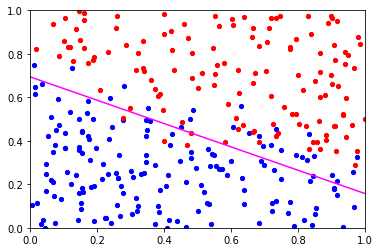

In [6]:
arr = np.array([i/1000 for i in range(0, 1000)])
formula = lambda x : -((theta[0] * x + theta[2])/theta[1])
plt.scatter(points_x_0, points_y_0, s=18, c='blue')
plt.scatter(points_x_1, points_y_1, s=18, c='red')
plt.plot(arr, formula(arr), c="magenta")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()